In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

data_train = pd.read_csv(r'C:\mine\hongkong\hku\COMP7404 Computational Intelligence and Machine Learning\project\train.csv')
data_test_a = pd.read_csv(r'C:\mine\hongkong\hku\COMP7404 Computational Intelligence and Machine Learning\project\testA.csv')

In [2]:
# 查看数据集总体分布
data_train.shape
data_test_a.shape
data_train.info()    #通过info()查看特征的数据类型
data_test_a.info()
data_train.describe()    #粗略查看各特征的基本统计量
data_test_a.describe()    #粗略查看data_test_a的基本统计量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,purpose,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,...,189889.000000,189889.000000,189889.000000,189889.000000,189889.000000,191606.000000,182425.000000,189889.000000,189889.000000,189889.000000
mean,899999.500000,14436.954125,3.481690,13.244800,438.737804,72435.750740,0.614100,7.645184e+04,1.010430,1.744410,...,8.093976,8.527334,8.274840,14.592551,5.596296,11.626891,0.000833,0.003618,0.088341,2.180316
std,57735.171256,8737.430326,0.855195,4.766528,262.246698,106892.374933,0.675465,7.766237e+04,0.781732,2.367497,...,4.803759,7.303106,4.550902,8.109357,3.220978,5.464619,0.030516,0.064276,0.505161,1.841987
min,800000.000000,500.000000,3.000000,5.310000,14.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,849999.750000,8000.000000,3.000000,9.750000,248.890000,420.000000,0.000000,4.600000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,899999.500000,12000.000000,3.000000,12.740000,375.430000,7836.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,949999.250000,20000.000000,3.000000,15.990000,580.942500,119739.250000,1.000000,9.000000e+04,2.000000,4.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,999999.000000,40000.000000,5.000000,30.990000,1715.420000,378338.000000,5.000000,9.500000e+06,2.000000,13.000000,...,70.000000,99.000000,83.000000,112.000000,41.000000,90.000000,3.000000,3.000000,25.000000,28.000000


In [3]:
# 统计train,testA数据集中存在缺失值的特征个数
data_train.isnull().any().sum()
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')
data_test_a.isnull().any().sum()
print(f'There are {data_test_a.isnull().any().sum()} columns in testA dataset with missing values.')

There are 22 columns in train dataset with missing values.
There are 19 columns in testA dataset with missing values.


In [4]:
# 统计缺失特征大于50%的特征
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()    #将Dataframe数据结构转化为字典
fea_null_moreThanHalf = {}
for key,value in have_null_fea_dict.items():
    if value > 0.5:
        fea_null_moreThanHalf[key] = value
fea_null_moreThanHalf

{}

<Axes: >

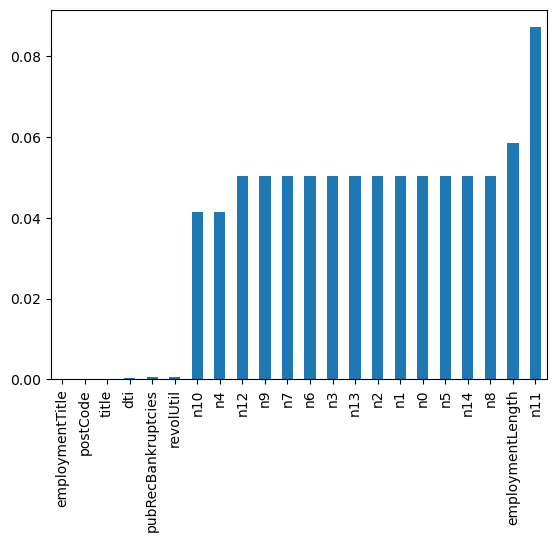

In [5]:
# train 中 nan缺失值的可视化
missing = data_train.isnull().sum()/len(data_train)
missing = missing[missing > 0]    #类似sql中的where子句进行过滤
missing.sort_values(inplace=True)    #排序，
missing.plot.bar()

<Axes: >

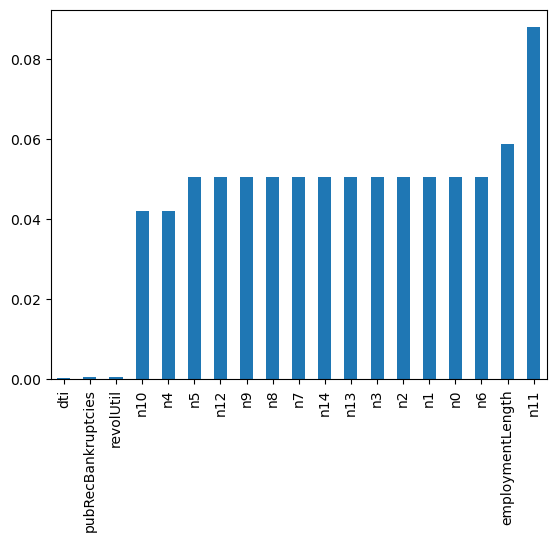

In [6]:
# testA缺失值的可视化
missing_a = data_test_a.isnull().sum()/len(data_test_a)
missing_a = missing_a[missing_a > 0]
missing_a.sort_values(inplace = True)
missing_a.plot.bar()

In [7]:
# 查看训练集测试集中特征属性只有一值的特征
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <=1]
one_value_fea
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <=1]
one_value_fea_test
print(f'There are {len(one_value_fea)} columns {one_value_fea} in train dataset with one unique value')
print(f'There are {len(one_value_fea_test)} columns {one_value_fea_test} in testA dataset with one unique value')

There are 1 columns ['policyCode'] in train dataset with one unique value
There are 1 columns ['policyCode'] in testA dataset with one unique value


In [8]:
# 查看特征数值类型，对象类型
# 将特征按object，number类型进行分类；numberical_fea为数值型特征，category_fea为对象特征
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
# category_fea = list(data_train.select_dtypes(include = ['object']).columns)

# 过滤数值型类别特征
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)

# 对离散型数值特征进行一个统计
i = 1
for fea in numerical_noserial_fea:
    if i <= len(numerical_noserial_fea):
        print(f'{fea}的汇总统计如下:')
        print(data_train[fea].value_counts().sort_index())
        print('----------------------分割线------------------------')
        i+=1

term的汇总统计如下:
term
3    606902
5    193098
Name: count, dtype: int64
----------------------分割线------------------------
homeOwnership的汇总统计如下:
homeOwnership
0    395732
1    317660
2     86309
3       185
4        33
5        81
Name: count, dtype: int64
----------------------分割线------------------------
verificationStatus的汇总统计如下:
verificationStatus
0    241222
1    309810
2    248968
Name: count, dtype: int64
----------------------分割线------------------------
isDefault的汇总统计如下:
isDefault
0    640390
1    159610
Name: count, dtype: int64
----------------------分割线------------------------
initialListStatus的汇总统计如下:
initialListStatus
0    466438
1    333562
Name: count, dtype: int64
----------------------分割线------------------------
applicationType的汇总统计如下:
applicationType
0    784586
1     15414
Name: count, dtype: int64
----------------------分割线------------------------
policyCode的汇总统计如下:
policyCode
1.0    800000
Name: count, dtype: int64
----------------------分割线------------------------
n11的汇总统计

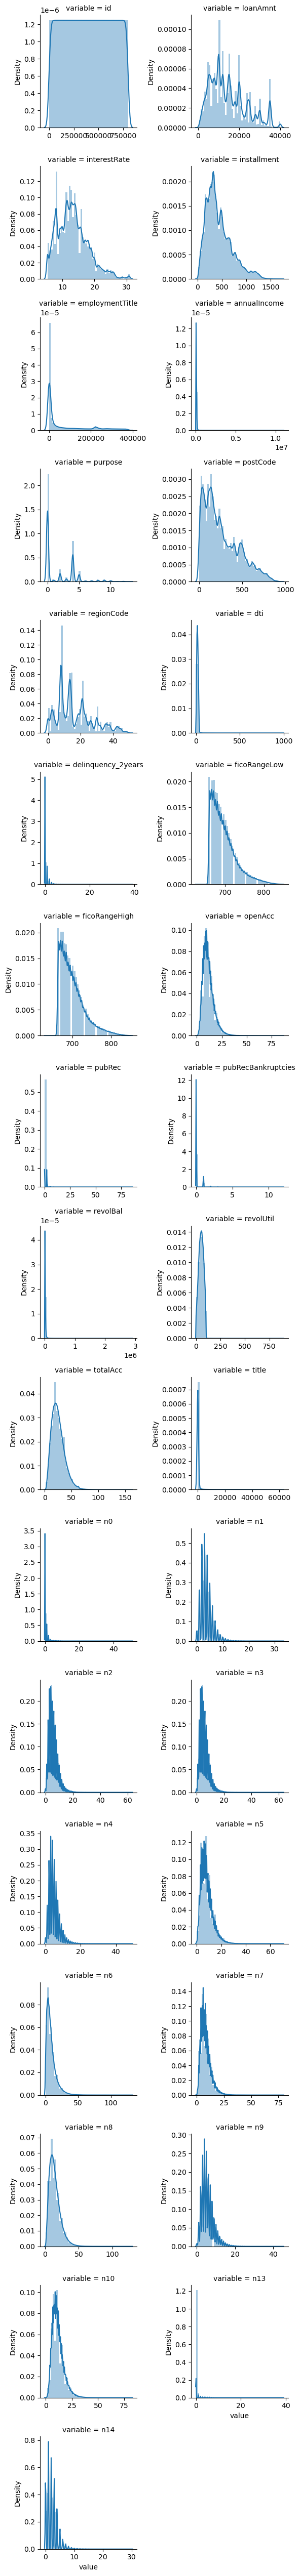

In [10]:
# 连续型数值变量的分析
f = pd.melt(data_train,value_vars=numerical_serial_fea)
g = sns.FacetGrid(f,col="variable",col_wrap=2,sharex=False,sharey=False)
g = g.map(sns.distplot,"value")

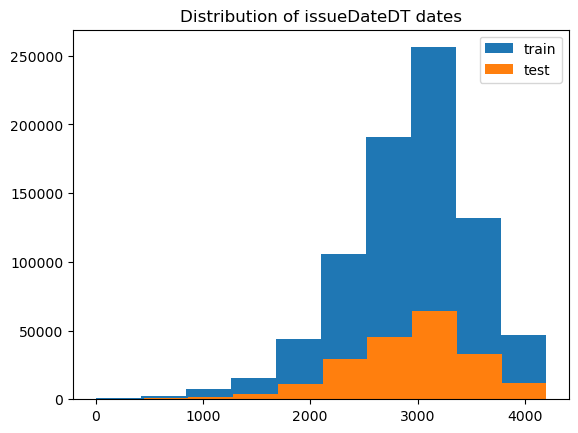

In [9]:
#转化成时间格式  issueDateDT特征表示数据日期离数据集中日期最早的日期（2007-06-01）的天数
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days

#转化成时间格式
data_test_a['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_test_a['issueDateDT'] = data_test_a['issueDate'].apply(lambda x: x-startdate).dt.days

plt.hist(data_train['issueDateDT'], label='train');
plt.hist(data_test_a['issueDateDT'], label='test');
plt.legend();
plt.title('Distribution of issueDateDT dates');
#train 和 test issueDateDT 日期有重叠 所以使用基于时间的分割进行验证是不明智的

In [10]:
# 掌握透视图可以让我们更好的了解数据
#透视图 索引可以有多个，“columns（列）”是可选的，聚合函数aggfunc最后是被应用到了变量“values”中你所列举的项目上。
pivot = pd.pivot_table(data_train, index=['grade'], columns=['issueDateDT'], values=['loanAmnt'], aggfunc=np.sum)
pivot

loanAmnt                                                         \
issueDateDT     0        30       61       92       122      153       183    
grade                                                                         
A                NaN  53650.0  42000.0  19500.0  34425.0  63950.0   43500.0   
B                NaN  13000.0  24000.0  32125.0   7025.0  95750.0  164300.0   
C                NaN  68750.0   8175.0  10000.0  61800.0  52550.0  175375.0   
D                NaN      NaN   5500.0   2850.0  28625.0      NaN  167975.0   
E             7500.0      NaN  10000.0      NaN  17975.0   1500.0   94375.0   
F                NaN      NaN  31250.0   2125.0      NaN      NaN       NaN   
G                NaN      NaN      NaN      NaN      NaN      NaN       NaN   

                                           ...                          \
issueDateDT      214       245       274   ...        3926        3957   
grade                                      ...                           
A            168825.0   85600.0  101825.0  ...  13093850.0  11757325.0   
B            303175.0  434425.0  538450.0  ...  16863100.0  17275175.0   
C            151100.0  243725.0  393150.0  ...  17502375.0  17471500.0   
D            171325.0  192900.0  269325.0  ...  11403075.0  10964150.0   
E            116450.0   42000.0  139775.0  ...   3983050.0   3410125.0   
F             49000.0   27000.0   43000.0  ...   1074175.0    868925.0   
G             24625.0       NaN       NaN  ...     56100.0    243275.0   

                                                                       \
issueDateDT        3987        4018        4048       4079       4110   
grade                                                                   
A            11945975.0   9144000.0   7977650.0  6888900.0  5109800.0   
B            16217500.0  11431350.0   8967750.0  7572725.0  4884600.0   
C            16111225.0  11973675.0  10184450.0  7765000.0  5354450.0   
D            10747675.0   7082050.0   7189625.0  5195700.0  3455175.0   
E             3107150.0   2341825.0   2225675.0  1643675.0  1091025.0   
F              761675.0    685325.0    665750.0   685200.0   316700.0   
G              224825.0     64050.0    198575.0   245825.0    53125.0   

                                              
issueDateDT       4140       4171       4201  
grade                                         
A            3919275.0  2694025.0  2245625.0  
B            4329400.0  3922575.0  3257100.0  
C            4552600.0  2870050.0  2246250.0  
D            3038500.0  2452375.0  1771750.0  
E            1131625.0   883950.0   802425.0  
F             315075.0    72300.0        NaN  
G              23750.0    25100.0     1000.0  

[7 rows x 139 columns]

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import warnings
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, log_loss

In [12]:
#数据缺失值的填充，时间格式特征的转化处理，某些对象类别特征的处理
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x: x not in numerical_fea,list(data_train.columns)))
label = 'isDefault'
numerical_fea.remove(label)

In [13]:
#查看缺失值情况
data_train.isnull().sum()
#按照平均数填充数值型特征
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_train[numerical_fea].median())
#按照众数填充类别型特征
data_train[category_fea] = data_train[category_fea].fillna(data_train[category_fea].mode())
data_test_a[category_fea] = data_test_a[category_fea].fillna(data_train[category_fea].mode())

In [14]:
#转化成时间格式
for data in [data_train, data_test_a]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d')
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
    #构造时间特征
    data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days
data_train['employmentLength'].value_counts(dropna=False).sort_index()
# 时间格式的进一步整理为整数类型
def employmentLength_to_int(s):
    if pd.isnull(s):
        return s
    else:
        return np.int8(s.split()[0])
for data in [data_train, data_test_a]:
    data['employmentLength'].replace(to_replace='10+ years', value='10 years', inplace=True)
    data['employmentLength'].replace('< 1 year', '0 years', inplace=True)
    data['employmentLength'] = data['employmentLength'].apply(employmentLength_to_int)
data['employmentLength'].value_counts(dropna=False).sort_index()

employmentLength
0.0     15989
1.0     13182
2.0     18207
3.0     16011
4.0     11833
5.0     12543
6.0      9328
7.0      8823
8.0      8976
9.0      7594
10.0    65772
NaN     11742
Name: count, dtype: int64

In [15]:
# 对earliesCreditLine进行预处理
for data in [data_train, data_test_a]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:]))
    # 部分类别特征
cate_features = ['grade', 'subGrade', 'employmentTitle', 'homeOwnership', 'verificationStatus', 'purpose', 'postCode', 'regionCode', \
                 'applicationType', 'initialListStatus', 'title', 'policyCode']
for f in cate_features:
    print(f, '类型数：', data[f].nunique())
# 像等级这种类别特征，是有优先级的可以labelencode或者自映射
for data in [data_train, data_test_a]:
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
# 类型数在2之上，又不是高维稀疏的,且纯分类特征
for data in [data_train, data_test_a]:
    data = pd.get_dummies(data, columns=['subGrade', 'homeOwnership', 'verificationStatus', 'purpose', 'regionCode'], drop_first=True)

grade 类型数： 7
subGrade 类型数： 35
employmentTitle 类型数： 79282
homeOwnership 类型数： 6
verificationStatus 类型数： 3
purpose 类型数： 14
postCode 类型数： 889
regionCode 类型数： 51
applicationType 类型数： 2
initialListStatus 类型数： 2
title 类型数： 12058
policyCode 类型数： 1


In [16]:
# 均方差检测异常: 68% 的数据值会在均值的一个标准差范围内，大约 95% 会在两个标准差范围内，大约 99.7% 会在三个标准差范围内。
def find_outliers_by_3segama(data,fea):
    data_std = np.std(data[fea])
    data_mean = np.mean(data[fea])
    outliers_cut_off = data_std * 3
    lower_rule = data_mean - outliers_cut_off
    upper_rule = data_mean + outliers_cut_off
    data[fea+'_outliers'] = data[fea].apply(lambda x:str('异常值') if x > upper_rule or x < lower_rule else '正常值')
    return data

In [17]:
# 得到特征的异常值后可以进一步分析变量异常值和目标变量的关系
data_train = data_train.copy()
for fea in numerical_fea:
    data_train = find_outliers_by_3segama(data_train,fea)
    print(data_train[fea+'_outliers'].value_counts())
    print(data_train.groupby(fea+'_outliers')['isDefault'].sum())
    print('*'*10)

id_outliers
正常值    800000
Name: count, dtype: int64
id_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
loanAmnt_outliers
正常值    800000
Name: count, dtype: int64
loanAmnt_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
term_outliers
正常值    800000
Name: count, dtype: int64
term_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
interestRate_outliers
正常值    794259
异常值      5741
Name: count, dtype: int64
interestRate_outliers
异常值      2916
正常值    156694
Name: isDefault, dtype: int64
**********
installment_outliers
正常值    792046
异常值      7954
Name: count, dtype: int64
installment_outliers
异常值      2152
正常值    157458
Name: isDefault, dtype: int64
**********
employmentTitle_outliers
正常值    800000
Name: count, dtype: int64
employmentTitle_outliers
正常值    159610
Name: isDefault, dtype: int64
**********
homeOwnership_outliers
正常值    799701
异常值       299
Name: count, dtype: int64
homeOwnership_outliers
异常值        62
正常值    159548
Name: isDefault, dtype

In [18]:
#删除异常值
for fea in numerical_fea:
    data_train = data_train[data_train[fea+'_outliers']=='正常值']
    data_train = data_train.reset_index(drop=True) 

In [19]:
# 固定宽度分箱
# 通过除法映射到间隔均匀的分箱中，每个分箱的取值范围都是loanAmnt/1000
data['loanAmnt_bin1'] = np.floor_divide(data['loanAmnt'], 1000)
## 通过对数函数映射到指数宽度分箱
data['loanAmnt_bin2'] = np.floor(np.log10(data['loanAmnt']))

# 分位数分箱
data['loanAmnt_bin3'] = pd.qcut(data['loanAmnt'], 10, labels=False)

In [20]:
for col in ['grade', 'subGrade']: 
    temp_dict = data_train.groupby([col])['isDefault'].agg(['mean']).reset_index().rename(columns={'mean': col + '_target_mean'})
    temp_dict.index = temp_dict[col].values
    temp_dict = temp_dict[col + '_target_mean'].to_dict()

    data_train[col + '_target_mean'] = data_train[col].map(temp_dict)
    data_test_a[col + '_target_mean'] = data_test_a[col].map(temp_dict)
    
# 其他衍生变量 mean 和 std
for df in [data_train, data_test_a]:
    for item in ['n0','n1','n2','n4','n5','n6','n7','n8','n9','n10','n11','n12','n13','n14']:
        df['grade_to_mean_' + item] = df['grade'] / df.groupby([item])['grade'].transform('mean')
        df['grade_to_std_' + item] = df['grade'] / df.groupby([item])['grade'].transform('std')

In [21]:
# abelEncode 直接放入树模型中
#label-encode:subGrade,postCode,title
# 高维类别特征需要进行转换
for col in tqdm(['employmentTitle', 'postCode', 'title','subGrade']):
    le = LabelEncoder()
    le.fit(list(data_train[col].astype(str).values) + list(data_test_a[col].astype(str).values))
    data_train[col] = le.transform(list(data_train[col].astype(str).values))
    data_test_a[col] = le.transform(list(data_test_a[col].astype(str).values))
print('Label Encoding 完成')

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.10it/s]

Label Encoding 完成


In [22]:
# 删除不需要的数据
for data in [data_train, data_test_a]:
    data.drop(['issueDate'], axis=1,inplace=True)
# "纵向用缺失值上面的值替换缺失值"
data_train = data_train.fillna(axis=0,method='ffill')

x_train = data_train
#计算协方差
'''
data_corr = x_train.corrwith(data_train.isDefault) #计算相关性
result = pd.DataFrame(columns=['features', 'corr'])
result['features'] = data_corr.index
result['corr'] = data_corr.values
'''
# 当然也可以直接看图
data_numeric = data_train[numerical_fea]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

features = [f for f in data_train.columns if f not in ['id','issueDate','isDefault'] and '_outliers' not in f]
x_train = data_train[features]
x_test = data_test_a[features]
y_train = data_train['isDefault']

KeyError: "['issueDate'] not in index"